# ¿Qué son los árboles de decisión?

En palabras sencillas, un árbol de decisión es una estructura que contiene nodos (cajas rectangulares) y aristas (flechas) y se construye a partir de un conjunto de datos (tabla de columnas que representan características/atributos y filas que corresponden a registros). Cada nodo se utiliza para tomar una decisión (conocido como nodo de decisión) o representa un resultado (conocido como nodo hoja).

## Comencemos con un ejercicio: 
1- Utilice un arbol de decisión para clasificar las observaciones. 

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import pandas as pd

In [18]:
cancer = load_breast_cancer(as_frame=True)

In [19]:
df = cancer.data

In [20]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
from sklearn.model_selection import train_test_split

In [59]:
X = df.values
y = target.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=33)

model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
model.fit(Xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

[Text(0.5882352941176471, 0.9166666666666666, 'x[22] <= 105.95\nentropy = 0.952\nsamples = 455\nvalue = [169, 286]'),
 Text(0.29411764705882354, 0.75, 'x[27] <= 0.135\nentropy = 0.256\nsamples = 279\nvalue = [12, 267]'),
 Text(0.11764705882352941, 0.5833333333333334, 'x[21] <= 30.145\nentropy = 0.066\nsamples = 257\nvalue = [2, 255]'),
 Text(0.058823529411764705, 0.4166666666666667, 'entropy = 0.0\nsamples = 222\nvalue = [0, 222]'),
 Text(0.17647058823529413, 0.4166666666666667, 'x[27] <= 0.092\nentropy = 0.316\nsamples = 35\nvalue = [2, 33]'),
 Text(0.11764705882352941, 0.25, 'entropy = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.23529411764705882, 0.25, 'x[5] <= 0.068\nentropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(0.17647058823529413, 0.08333333333333333, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.29411764705882354, 0.08333333333333333, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.47058823529411764, 0.5833333333333334, 'x[21] <= 25.94\nentropy = 0.994\

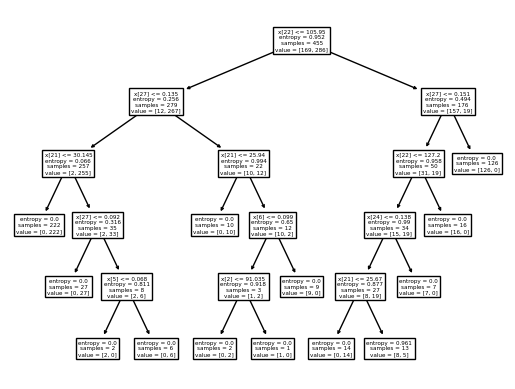

In [60]:
tree.plot_tree(model)

In [90]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [95]:
featuresImportance=pd.DataFrame(df.columns)
featuresImportance['Importance'] = model.feature_importances_
featuresImportance.sort_values(by='Importance', ascending=False)

,0,Importance
22,worst perimeter,0.687176
27,worst concave points,0.181217
21,worst texture,0.073876
24,worst smoothness,0.023751
5,mean compactness,0.015432
6,mean concavity,0.011997
2,mean perimeter,0.006551
0,mean radius,0.000000
17,concave points error,0.000000
28,worst symmetry,0.000000


In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

In [61]:
ypred = model.predict(Xtest)

In [62]:
accuracy_score(y_pred=ypred, y_true=ytest)

0.9210526315789473

In [63]:
confusion_matrix(y_pred=ypred, y_true=ytest)

array([[38,  5],
       [ 4, 67]], dtype=int64)

In [64]:
recall_score(y_pred=ypred, y_true=ytest)

0.9436619718309859

## Medidas de selección de atributos 

In [9]:
import pandas as pd

In [10]:
covid=pd.read_csv('covid.csv')
covid = covid.drop(columns=['id']) 

In [11]:
covid.head()

,fever,cough,breathing_issues,infected
0,no,no,no,no
1,yes,yes,yes,yes
2,yes,yes,no,no
3,yes,no,yes,yes
4,yes,yes,yes,yes


## Métricas en ID3
Como vimos en la clase 2, el algoritmo ID3 selecciona la mejor característica en cada paso mientras construye un árbol de decisión.
Antes de que lo pregunte, la respuesta a la pregunta: "¿Cómo selecciona ID3 la mejor característica?" es que ID3 utiliza la ganancia de información o simplemente la ganancia para encontrar la mejor característica.

La ganancia de información calcula la reducción de la entropía y mide lo bien que una característica determinada separa o clasifica las clases objetivo. La característica con la mayor ganancia de información se selecciona como la mejor.


In [12]:
covid['fever'] = covid['fever'].map({'yes':1 ,'no':0})
covid['cough'] = covid['cough'].map({'yes':1 ,'no':0})
covid['breathing_issues'] = covid['breathing_issues'].map({'yes':1 ,'no':0})
covid['infected'] = covid['infected'].map({'yes':1 ,'no':0})

In [13]:
covid.head()

,fever,cough,breathing_issues,infected
0,0,0,0,0
1,1,1,1,1
2,1,1,0,0
3,1,0,1,1
4,1,1,1,1


In [14]:
from sklearn import tree

In [15]:
X = covid.drop('infected', axis=1).values
y = covid['infected'].values

model = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.5, 0.8333333333333334, 'X[2] <= 0.5\nentropy = 0.985\nsamples = 14\nvalue = [6, 8]'),
 Text(0.25, 0.5, 'X[0] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.75, 0.5, 'X[0] <= 0.5\nentropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

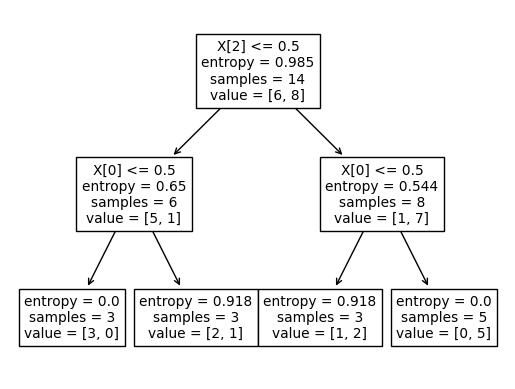

In [16]:
tree.plot_tree(model)

* Ejercicio realizar el cálculo de ganancia de información al igual que se hizo en la teoría.

Del total de 14 filas de nuestro conjunto de datos S, hay 8 filas con el valor objetivo SI y 6 filas con el valor objetivo NO. La entropía de S se calcula como:
$$
Entropy(S)=-(8/14)\log_{2}(8/14)-(6/14)\log_{2}(6/14)=0.99
$$

Ahora calculamos la ganancia de información de cada característica:

Cálculo de Ganancia de información para Fiebre:
En esta característica (Fiebre) hay 8 filas con valor SÍ y 6 filas con valor NO.
Como se muestra a continuación, en las 8 filas con SÍ para Fiebre, hay 6 filas con valor objetivo SÍ y 2 filas con valor objetivo NO.

In [30]:
covid['fever'].value_counts()

1    8
0    6
Name: fever, dtype: int64

In [31]:
covid

,fever,cough,breathing_issues,infected
0,0,0,0,0
1,1,1,1,1
2,1,1,0,0
3,1,0,1,1
4,1,1,1,1
5,0,1,0,0
6,1,0,1,1
7,1,0,1,1
8,0,1,1,1
9,1,1,0,1


Total de filas

|S| = 14

For v = YES, |Sᵥ| = 8

Entropy(Sᵥ) = - (6/8) * log₂(6/8) - (2/8) * log₂(2/8) = 0.81

For v = NO, |Sᵥ| = 6

Entropy(Sᵥ) = - (2/6) * log₂(2/6) - (4/6) * log₂(4/6) = 0.91

Ampliando la suma en la fórmula de ganancia:

IG(S, Fever) = Entropy(S) - (|Sʏᴇꜱ| / |S|) * Entropy(Sʏᴇꜱ) - 
(|Sɴᴏ| / |S|) * Entropy(Sɴᴏ)∴ IG(S, Fever) = 0.99 - (8/14) * 0.81 - (6/14) * 0.91 = 0.13

A continuación, calculamos el ganancia para las características "cough" y "breathing_issues".

IG(S, Cough) = 0.04

IG(S, BreathingIssues) = 0.40

Dado que la característica breathing_issues tiene la mayor ganancia de información, se utiliza para crear el nodo raíz.